# Цель проекта

Цель проекта "Авиарейсы без потерь" - выяснить от каких самых малоприбыльных рейсов из Анапы мы можем отказаться в зимнее время.

Выгруженный датасет из SQL состоит из:

flight_id - id рейса,

flight_no - номер рейса,

arrival_airport - аэропорт прилета,

actual_departure - фактическое время отправления,

actual_arrival - фактическое время прибытия,

aircraft_code - код самолета

model - модель самолёта,

flight_duration - время полета в минутах,

total_seats - всего мест в самолете

sold_tickets - общее количество проданных билетов,

sum_tickets - общая выручка от продаж билетов,

flight_profitability - прибыльность рейса в руб

In [59]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)
df = pd.read_csv('project_4.csv' )

df

,flight_id,flight_no,arrival_airport,actual_departure,actual_arrival,aircraft_code,model,flight_duration,total_seats,sold_tickets,sum_tickets,flight_profitability
0,136807,PG0480,EGO,2017-02-23T09:28:00Z,2017-02-23T10:18:00Z,SU9,Sukhoi Superjet-100,50.00,97,68.00,531000.00,470585.16
1,136642,PG0480,EGO,2017-01-30T09:28:00Z,2017-01-30T10:17:00Z,SU9,Sukhoi Superjet-100,49.00,97,64.00,531000.00,471793.46
2,136844,PG0480,EGO,2017-02-28T09:26:00Z,2017-02-28T10:16:00Z,SU9,Sukhoi Superjet-100,50.00,97,79.00,575100.00,514685.16
3,136887,PG0480,EGO,2017-01-20T09:30:00Z,2017-01-20T10:19:00Z,SU9,Sukhoi Superjet-100,49.00,97,78.00,595200.00,535993.46
4,136922,PG0480,EGO,2017-02-11T09:27:00Z,2017-02-11T10:17:00Z,SU9,Sukhoi Superjet-100,50.00,97,76.00,607800.00,547385.16
...,...,...,...,...,...,...,...,...,...,...,...,...
188,136540,PG0194,NOZ,2017-01-17T06:14:00Z,2017-01-17T11:21:00Z,733,Boeing 737-300,307.00,130,NaN,NaN,NaN
189,136533,PG0194,NOZ,2016-12-13T06:13:00Z,2016-12-13T11:16:00Z,733,Boeing 737-300,303.00,130,NaN,NaN,NaN
190,136564,PG0194,NOZ,2016-12-27T06:16:00Z,2016-12-27T11:21:00Z,733,Boeing 737-300,305.00,130,NaN,NaN,NaN
191,136546,PG0194,NOZ,2017-01-03T06:13:00Z,2017-01-03T11:15:00Z,733,Boeing 737-300,302.00,130,NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flight_id             193 non-null    int64  
 1   flight_no             193 non-null    object 
 2   arrival_airport       193 non-null    object 
 3   actual_departure      193 non-null    object 
 4   actual_arrival        193 non-null    object 
 5   aircraft_code         193 non-null    object 
 6   model                 193 non-null    object 
 7   flight_duration       193 non-null    float64
 8   total_seats           193 non-null    int64  
 9   sold_tickets          180 non-null    float64
 10  sum_tickets           180 non-null    float64
 11  flight_profitability  180 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 18.2+ KB


Видно, что есть рейсы в Новокузнецк, в которых отсутствует информация о продажах билетов, поэтому они не смогут быть в нашем дальнейшем исследовании, поэтому мы их удалим

In [65]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flight_id             180 non-null    int64  
 1   flight_no             180 non-null    object 
 2   arrival_airport       180 non-null    object 
 3   actual_departure      180 non-null    object 
 4   actual_arrival        180 non-null    object 
 5   aircraft_code         180 non-null    object 
 6   model                 180 non-null    object 
 7   flight_duration       180 non-null    float64
 8   total_seats           180 non-null    int64  
 9   sold_tickets          180 non-null    float64
 10  sum_tickets           180 non-null    float64
 11  flight_profitability  180 non-null    float64
 12  occupied_seats        180 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 19.7+ KB


In [66]:
# выведем какие модели самолетов в какие города летают
df.groupby(by=['arrival_airport', 'model']).flight_id.count()

arrival_airport  model              
EGO              Sukhoi Superjet-100    90
SVO              Boeing 737-300         90
Name: flight_id, dtype: int64

In [ ]:
# EGO - это код аэропорта г.Белгорода
# SVO - это код аэропорта г.Москва, Шерементьево

Таким образом в Белгород у нас летают самолеты марки Sukhoi Superjet-100,
а в Мосвку - Boeing 737-300

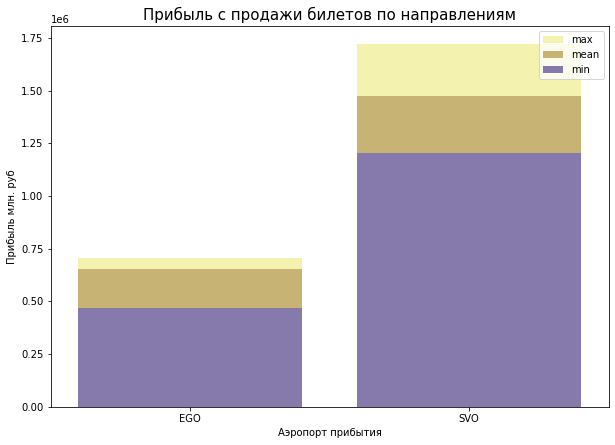

In [67]:
# Прибыль с продажи билетов по направлениям
ptofit_per_city = df.groupby('arrival_airport').flight_profitability.agg(['min', 'mean', 'max']).astype('int64').reset_index()
fig, ax = plt.subplots(figsize=(10,7))
sns.set_color_codes('pastel')
sns.barplot(x='arrival_airport', y='max', data=ptofit_per_city,color = 'y', label = 'max')
sns.set_color_codes('muted')
sns.barplot(x='arrival_airport', y='mean', data=ptofit_per_city, color = 'y', label = 'mean')
sns.set_color_codes('deep')
sns.barplot(x='arrival_airport', y='min', data=ptofit_per_city, color = 'm', label = 'min')
ax.legend(loc = 1)
plt.ylabel(None)
ax.set_title('Прибыль с продажи билетов по направлениям',fontsize= 15)
ax.set_xlabel('Аэропорт прибытия')
ax.set_ylabel('Прибыль млн. руб');

По графикам можно увидеть, что прибыль от рейсов в Москву больше в два раза, чем в Белгород, но и рейс в Москву в два раза дольше.   

Посмотрим какова зависимость заполненности самолета от дня недели.

In [68]:
# Создадим призак дня недели, в который совершался полет: weekday.
df['actual_arrival'] = pd.to_datetime(df['actual_arrival'])
df.loc[:, 'weekday'] = df['actual_arrival'].apply(lambda x: x.weekday() + 1)
weekday = {1:'ПН', 2: 'ВТ', 3: 'СР', 4: 'ЧТ', 5: 'ПТ', 6: 'СБ', 7: 'ВС'}
df['weekday'] = df['weekday'].map(weekday)
df

,flight_id,flight_no,arrival_airport,actual_departure,actual_arrival,aircraft_code,model,flight_duration,total_seats,sold_tickets,sum_tickets,flight_profitability,occupied_seats,weekday
0,136807,PG0480,EGO,2017-02-23T09:28:00Z,2017-02-23 10:18:00+00:00,SU9,Sukhoi Superjet-100,50.00,97,68.00,531000.00,470585.16,0.70,ЧТ
1,136642,PG0480,EGO,2017-01-30T09:28:00Z,2017-01-30 10:17:00+00:00,SU9,Sukhoi Superjet-100,49.00,97,64.00,531000.00,471793.46,0.66,ПН
2,136844,PG0480,EGO,2017-02-28T09:26:00Z,2017-02-28 10:16:00+00:00,SU9,Sukhoi Superjet-100,50.00,97,79.00,575100.00,514685.16,0.81,ВТ
3,136887,PG0480,EGO,2017-01-20T09:30:00Z,2017-01-20 10:19:00+00:00,SU9,Sukhoi Superjet-100,49.00,97,78.00,595200.00,535993.46,0.80,ПТ
4,136922,PG0480,EGO,2017-02-11T09:27:00Z,2017-02-11 10:17:00+00:00,SU9,Sukhoi Superjet-100,50.00,97,76.00,607800.00,547385.16,0.78,СБ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,136465,PG0252,SVO,2016-12-15T10:05:00Z,2016-12-15 11:47:00+00:00,733,Boeing 737-300,102.00,130,130.00,1886000.00,1711800.32,1.00,ЧТ
176,136316,PG0252,SVO,2017-01-12T10:07:00Z,2017-01-12 11:47:00+00:00,733,Boeing 737-300,100.00,130,130.00,1886000.00,1715216.00,1.00,ЧТ
177,136368,PG0252,SVO,2016-12-31T10:07:00Z,2016-12-31 11:47:00+00:00,733,Boeing 737-300,100.00,130,130.00,1886000.00,1715216.00,1.00,СБ
178,136226,PG0252,SVO,2017-01-30T10:08:00Z,2017-01-30 11:48:00+00:00,733,Boeing 737-300,100.00,130,130.00,1886000.00,1715216.00,1.00,ПН


In [69]:
# Создадим признак доли занятых мест: occupied_seats  
df['occupied_seats'] = round(df['sold_tickets']/df['total_seats'], 2)
df


,flight_id,flight_no,arrival_airport,actual_departure,actual_arrival,aircraft_code,model,flight_duration,total_seats,sold_tickets,sum_tickets,flight_profitability,occupied_seats,weekday
0,136807,PG0480,EGO,2017-02-23T09:28:00Z,2017-02-23 10:18:00+00:00,SU9,Sukhoi Superjet-100,50.00,97,68.00,531000.00,470585.16,0.70,ЧТ
1,136642,PG0480,EGO,2017-01-30T09:28:00Z,2017-01-30 10:17:00+00:00,SU9,Sukhoi Superjet-100,49.00,97,64.00,531000.00,471793.46,0.66,ПН
2,136844,PG0480,EGO,2017-02-28T09:26:00Z,2017-02-28 10:16:00+00:00,SU9,Sukhoi Superjet-100,50.00,97,79.00,575100.00,514685.16,0.81,ВТ
3,136887,PG0480,EGO,2017-01-20T09:30:00Z,2017-01-20 10:19:00+00:00,SU9,Sukhoi Superjet-100,49.00,97,78.00,595200.00,535993.46,0.80,ПТ
4,136922,PG0480,EGO,2017-02-11T09:27:00Z,2017-02-11 10:17:00+00:00,SU9,Sukhoi Superjet-100,50.00,97,76.00,607800.00,547385.16,0.78,СБ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,136465,PG0252,SVO,2016-12-15T10:05:00Z,2016-12-15 11:47:00+00:00,733,Boeing 737-300,102.00,130,130.00,1886000.00,1711800.32,1.00,ЧТ
176,136316,PG0252,SVO,2017-01-12T10:07:00Z,2017-01-12 11:47:00+00:00,733,Boeing 737-300,100.00,130,130.00,1886000.00,1715216.00,1.00,ЧТ
177,136368,PG0252,SVO,2016-12-31T10:07:00Z,2016-12-31 11:47:00+00:00,733,Boeing 737-300,100.00,130,130.00,1886000.00,1715216.00,1.00,СБ
178,136226,PG0252,SVO,2017-01-30T10:08:00Z,2017-01-30 11:48:00+00:00,733,Boeing 737-300,100.00,130,130.00,1886000.00,1715216.00,1.00,ПН


In [25]:
# Посчитаем средние по дням недели по городам прилета
moscow = df.query('arrival_airport == "SVO"').groupby('weekday').mean()
belgorod = df.query('arrival_airport == "EGO"').groupby('weekday').mean()

[Text(0.5, 0, 'День недели'),
 Text(0, 0.5, 'Заполненность самолетов в Белгород')]

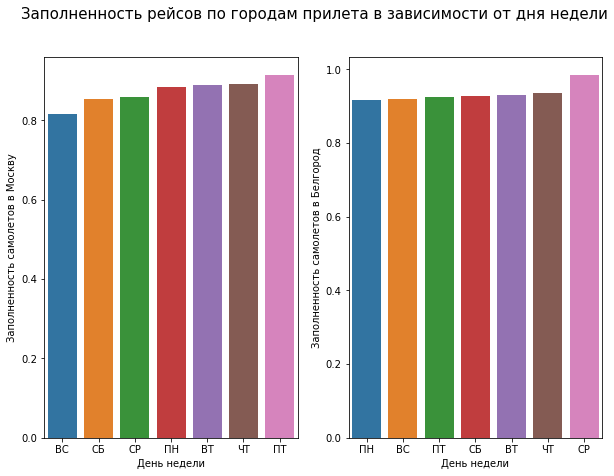

In [26]:
fig, ax = plt.subplots(1,2, figsize = (10,7))
fig.suptitle('Заполненность рейсов по городам прилета в зависимости от дня недели', fontsize= 15)
sns.barplot(data = moscow, y = 'occupied_seats', x = moscow.index, order = moscow.sort_values(by = 'occupied_seats').index, ax = ax[0])
sns.barplot(data = belgorod, y = 'occupied_seats', x = belgorod.index, order = belgorod.sort_values(by = 'occupied_seats').index, ax = ax[1])
ax[0].set(xlabel = 'День недели', ylabel = 'Заполненность самолетов в Москву')
ax[1].set(xlabel = 'День недели', ylabel = 'Заполненность самолетов в Белгород')

По гистограммам видим, что рейсы в Белгород в среднем заполнены практически всегда равномерно и с большим процентом, только в среду заполненность чуть выше.  Заполняемость по рейсам в Москву имеет зависимость от дней недели, причем в воскресенье она самая маленькая.

In [64]:
# рассмотрим рейсы, у которых заполняемость меньше 75%
df[df.occupied_seats < 0.75]

,flight_id,flight_no,arrival_airport,actual_departure,actual_arrival,aircraft_code,model,flight_duration,total_seats,sold_tickets,sum_tickets,flight_profitability,occupied_seats
0,136807,PG0480,EGO,2017-02-23T09:28:00Z,2017-02-23T10:18:00Z,SU9,Sukhoi Superjet-100,50.00,97,68.00,531000.00,470585.16,0.70
1,136642,PG0480,EGO,2017-01-30T09:28:00Z,2017-01-30T10:17:00Z,SU9,Sukhoi Superjet-100,49.00,97,64.00,531000.00,471793.46,0.66
90,136352,PG0252,SVO,2016-12-10T10:10:00Z,2016-12-10T11:50:00Z,733,Boeing 737-300,100.00,130,92.00,1372400.00,1201616.00,0.71
94,136253,PG0252,SVO,2016-12-24T10:08:00Z,2016-12-24T11:46:00Z,733,Boeing 737-300,98.00,130,93.00,1407800.00,1240431.68,0.72


Таких рейсов всего 4: два в Москву и два в Белгород.

<AxesSubplot:>

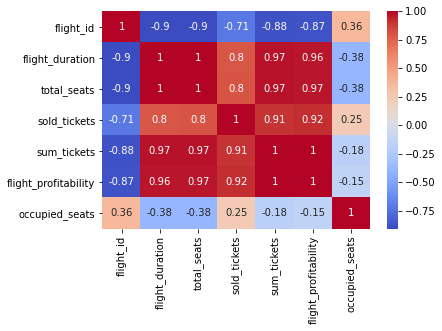

In [44]:
correlation = df.corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

<AxesSubplot:title={'center':'    Связь между прибылью и занятыми местами'}, xlabel='occupied_seats', ylabel='flight_profitability'>

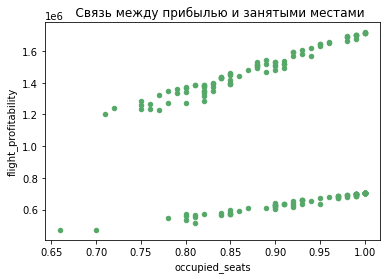

In [72]:
# построим диаграмму зависимости прибыли от проданных мест
df.plot(kind='scatter', 
        x='occupied_seats', 
        y='flight_profitability', 
        title='    Связь между прибылью и занятыми местами',
        color='g'
        )


In [ ]:
Видим, что прибыль сильно зависит от заполненности самолета

In [41]:
# ниже приведена табличка всего парка самолетов
molels = pd.read_csv('models.csv' )
molels

,model,total_seats
0,Airbus A319-100,116
1,Airbus A320-200,140
2,Airbus A321-200,170
3,Boeing 737-300,130
4,Boeing 767-300,222
5,Boeing 777-300,402
6,Cessna 208 Caravan,12
7,Bombardier CRJ-200,50
8,Sukhoi Superjet-100,97


Выводы:
1. На наших 4-х рейсах с самой низкой прибылью все же она не настолько низкая, чтобы отказываться от данных рейсов, хотя мы не учли еще много затрат на рейс, может быть картина бы изменилась.
2. Есть предложение рейсы PG0252 в Москву при низкой загруженности совершать на меньших самолетах, например на Sukhoi Superjet-100 или на Airbus A319-100, а рейсы PG0480 по понедельникам может даже исключить, или же сделать на них акции для привлечения спроса.